In [1]:
!pip install ultralytics
!pip install cvzone
!pip install cvzone ultralytics opencv-python
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 14.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=1a54465b07ebbdb1d96c985d5374eac92d33c6a5774abb6f7912ab32f2d0ab11
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


****Loading Model****

In [2]:
model = YOLO('/kaggle/input/yolov8n-face/pytorch/default/1/yolov8n-face.pt') 

# Downloading Dataset

In [3]:
!wget -q https://huggingface.co/datasets/wider_face/resolve/main/data/WIDER_train.zip
!wget -q https://huggingface.co/datasets/wider_face/resolve/main/data/WIDER_val.zip
!wget -q https://huggingface.co/datasets/wider_face/resolve/main/data/WIDER_test.zip
!wget -q http://shuoyang1213.me/WIDERFACE/support/bbx_annotation/wider_face_split.zip
!wget -q http://shuoyang1213.me/WIDERFACE/support/example/Submission_example.zip
!ls -lh *.zip


-rw-r--r-- 1 root root  624 Oct 26  2022 Submission_example.zip
-rw-r--r-- 1 root root 1.8G Jun 10  2022 WIDER_test.zip
-rw-r--r-- 1 root root 1.4G Jun 10  2022 WIDER_train.zip
-rw-r--r-- 1 root root 346M Jun 10  2022 WIDER_val.zip
-rw-r--r-- 1 root root 3.5M Oct 26  2022 wider_face_split.zip


In [4]:
!unzip -q WIDER_train.zip -d /kaggle/working/WIDER_train
!unzip -q WIDER_val.zip -d /kaggle/working/WIDER_val
!unzip -q WIDER_test.zip -d /kaggle/working/WIDER_test
!unzip -q wider_face_split.zip -d /kaggle/working/wider_face_split
!unzip -q Submission_example.zip -d /kaggle/working/Submission_example

In [5]:
!rm -f WIDER_train.zip WIDER_val.zip WIDER_test.zip wider_face_split.zip Submission_example.zip

# Confirm deletion
!ls -lh *.zip 


ls: cannot access '*.zip': No such file or directory


****Loading Dataset****

In [6]:
import glob
import random

image_folder = '/kaggle/working/WIDER_val/WIDER_val/images'
all_image_paths = glob.glob(f"{image_folder}/**/*.jpg", recursive=True)

print(f"Total images found: {len(all_image_paths)}")

Total images found: 3226


**Random Images From Dataset**

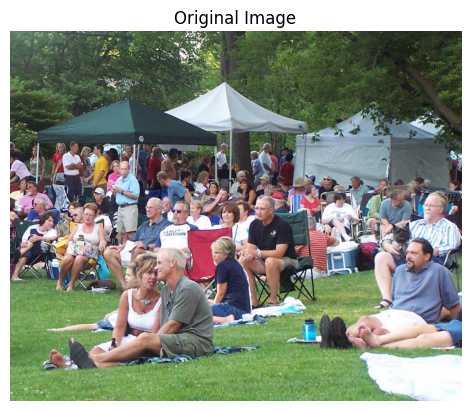

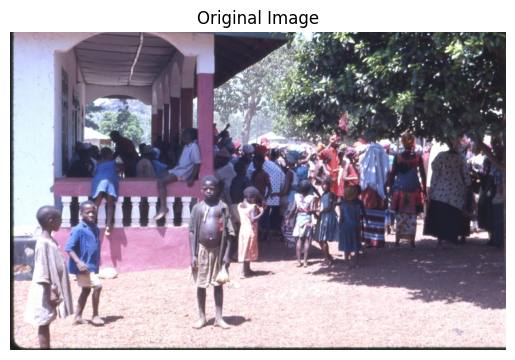

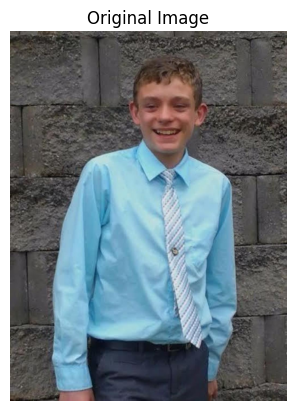

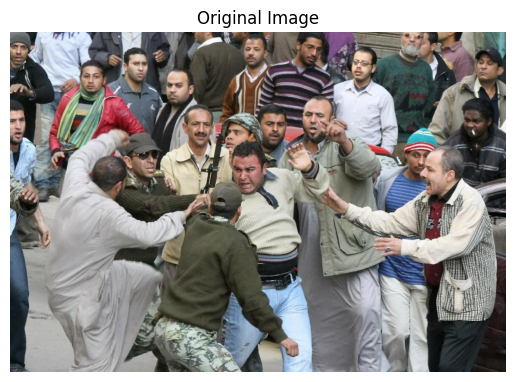

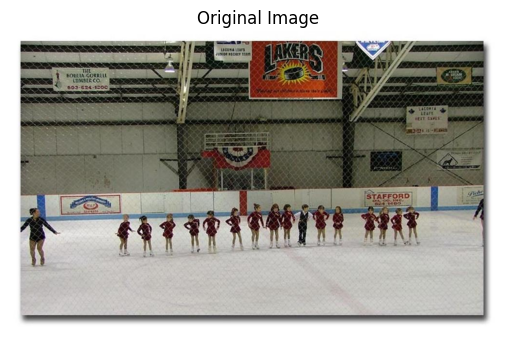

In [7]:
num_images = 5  
random_image_paths = random.sample(all_image_paths, num_images)

# Display original images
for img_path in random_image_paths:
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Original Image")
    plt.show()


# Detecting Faces


image 1/1 /kaggle/working/WIDER_val/WIDER_val/images/18--Concerts/18_Concerts_Concerts_18_602.jpg: 544x640 49 faces, 250.8ms
Speed: 14.2ms preprocess, 250.8ms inference, 20.7ms postprocess per image at shape (1, 3, 544, 640)


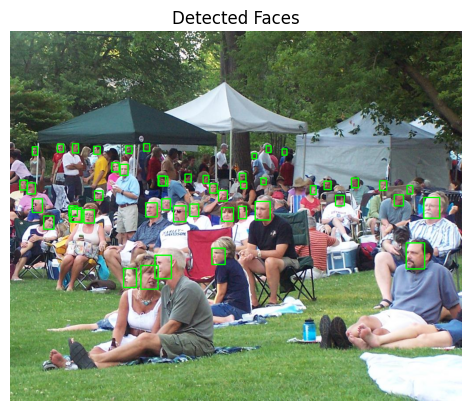


image 1/1 /kaggle/working/WIDER_val/WIDER_val/images/2--Demonstration/2_Demonstration_Political_Rally_2_456.jpg: 416x640 6 faces, 124.4ms
Speed: 2.8ms preprocess, 124.4ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


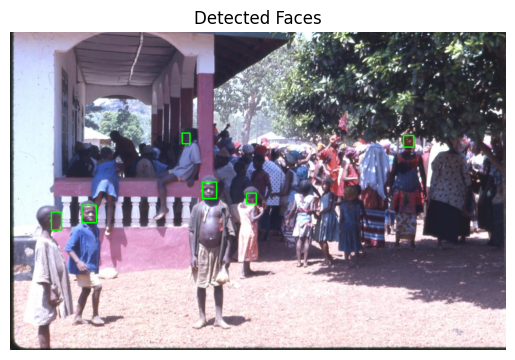


image 1/1 /kaggle/working/WIDER_val/WIDER_val/images/6--Funeral/6_Funeral_Funeral_6_461.jpg: 640x480 1 face, 125.4ms
Speed: 3.0ms preprocess, 125.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


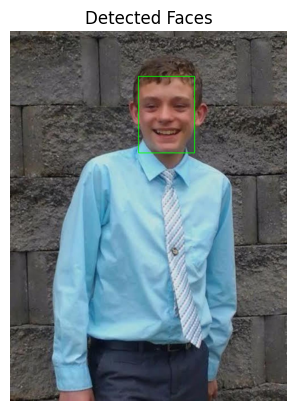


image 1/1 /kaggle/working/WIDER_val/WIDER_val/images/2--Demonstration/2_Demonstration_Protesters_2_618.jpg: 448x640 23 faces, 120.1ms
Speed: 2.6ms preprocess, 120.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


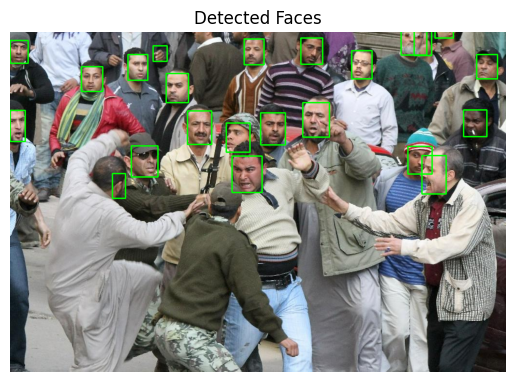


image 1/1 /kaggle/working/WIDER_val/WIDER_val/images/39--Ice_Skating/39_Ice_Skating_Ice_Skating_39_389.jpg: 416x640 4 faces, 96.2ms
Speed: 3.7ms preprocess, 96.2ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


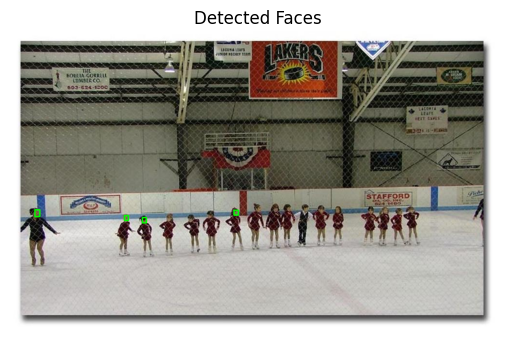

In [9]:
def display_detection_results(img_path, results):
    img = cv2.imread(img_path)
    for detection in results[0].boxes:
        x1, y1, x2, y2 = map(int, detection.xyxy[0])  
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2) 
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Detected Faces")
    plt.show()

for img_path in random_image_paths:
    results = model.predict(source=img_path, save=False, show=False)  # Detect faces
    display_detection_results(img_path, results)
    

# Annonymizing Detected Faces


image 1/1 /kaggle/working/WIDER_val/WIDER_val/images/18--Concerts/18_Concerts_Concerts_18_602.jpg: 544x640 49 faces, 136.8ms
Speed: 3.7ms preprocess, 136.8ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


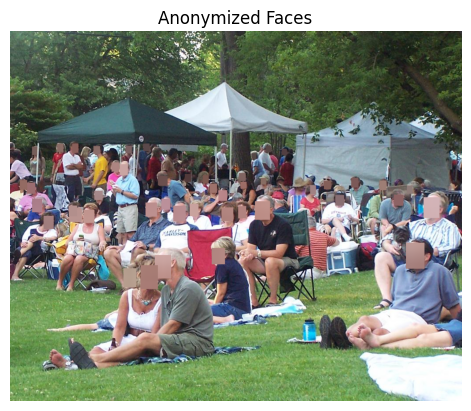


image 1/1 /kaggle/working/WIDER_val/WIDER_val/images/2--Demonstration/2_Demonstration_Political_Rally_2_456.jpg: 416x640 6 faces, 94.1ms
Speed: 3.8ms preprocess, 94.1ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


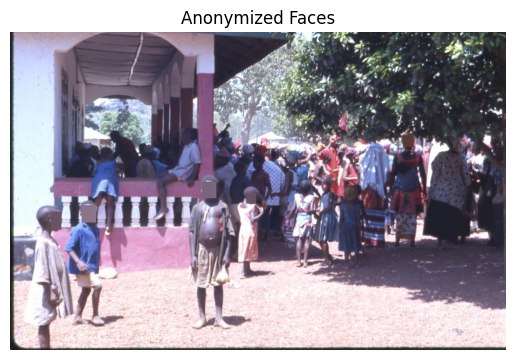


image 1/1 /kaggle/working/WIDER_val/WIDER_val/images/6--Funeral/6_Funeral_Funeral_6_461.jpg: 640x480 1 face, 111.3ms
Speed: 4.7ms preprocess, 111.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


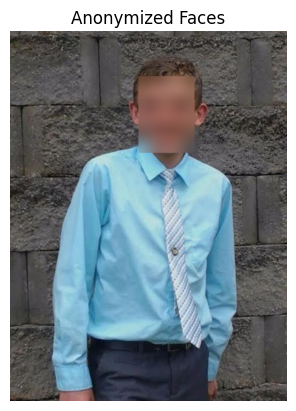


image 1/1 /kaggle/working/WIDER_val/WIDER_val/images/2--Demonstration/2_Demonstration_Protesters_2_618.jpg: 448x640 23 faces, 106.8ms
Speed: 2.5ms preprocess, 106.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


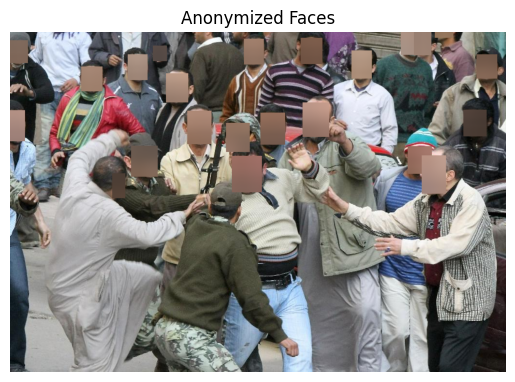


image 1/1 /kaggle/working/WIDER_val/WIDER_val/images/39--Ice_Skating/39_Ice_Skating_Ice_Skating_39_389.jpg: 416x640 4 faces, 117.0ms
Speed: 3.5ms preprocess, 117.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


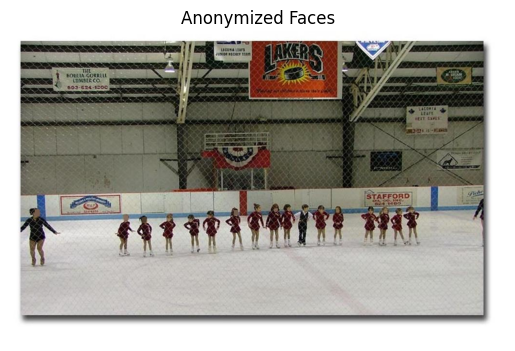

In [10]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

def anonymize_faces(img, detections):
    for detection in detections[0].boxes:
        x1, y1, x2, y2 = map(int, detection.xyxy[0]) 
        face = img[y1:y2, x1:x2] 
        face = cv2.GaussianBlur(face, (99, 99), 30)  
        img[y1:y2, x1:x2] = face  
    return img

def display_anonymized_image(img_path, results):
    img = cv2.imread(img_path)

    
    anonymized_img = anonymize_faces(img, results)
    img_rgb = cv2.cvtColor(anonymized_img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off') 
    plt.title("Anonymized Faces")
    plt.show()

for img_path in random_image_paths:
    results = model.predict(source=img_path, save=False, show=False)  # Detect faces
    display_anonymized_image(img_path, results)


# Picking Images from the Test Set of WiderFace - Detecting and Anonymizing Faces


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/12--Group/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_588.jpg: 352x640 12 faces, 86.0ms
Speed: 2.7ms preprocess, 86.0ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


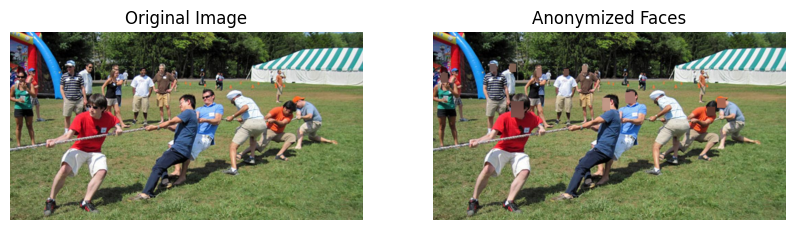


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/41--Swimming/41_Swimming_Swimmer_41_242.jpg: 448x640 1 face, 107.1ms
Speed: 2.6ms preprocess, 107.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


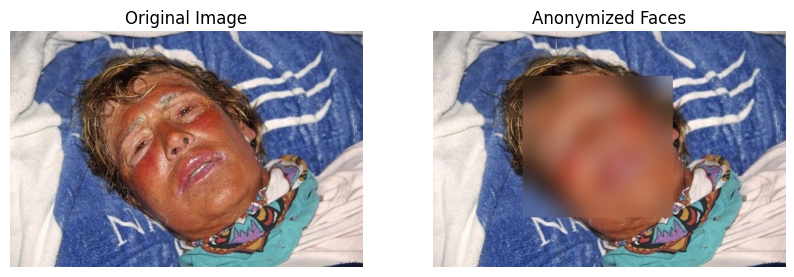


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/28--Sports_Fan/28_Sports_Fan_Sports_Fan_28_139.jpg: 416x640 7 faces, 100.5ms
Speed: 2.4ms preprocess, 100.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


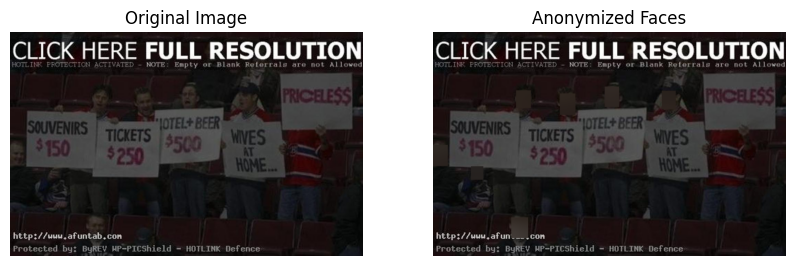


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/17--Ceremony/17_Ceremony_Ceremony_17_941.jpg: 640x448 7 faces, 102.4ms
Speed: 2.7ms preprocess, 102.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


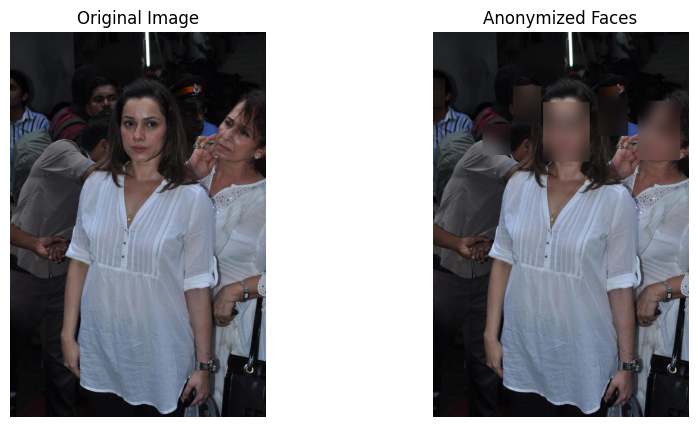


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/50--Celebration_Or_Party/50_Celebration_Or_Party_houseparty_50_176.jpg: 448x640 29 faces, 100.9ms
Speed: 4.1ms preprocess, 100.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


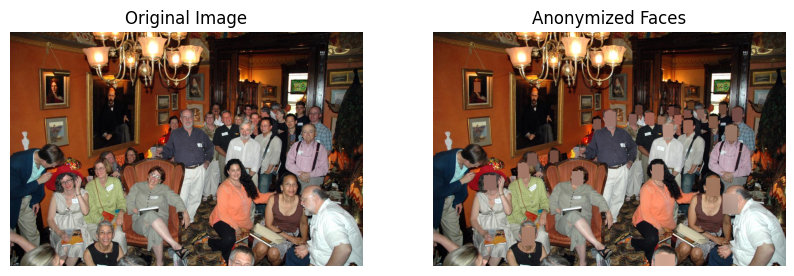


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/51--Dresses/51_Dresses_wearingdress_51_242.jpg: 640x416 1 face, 109.1ms
Speed: 2.9ms preprocess, 109.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 416)


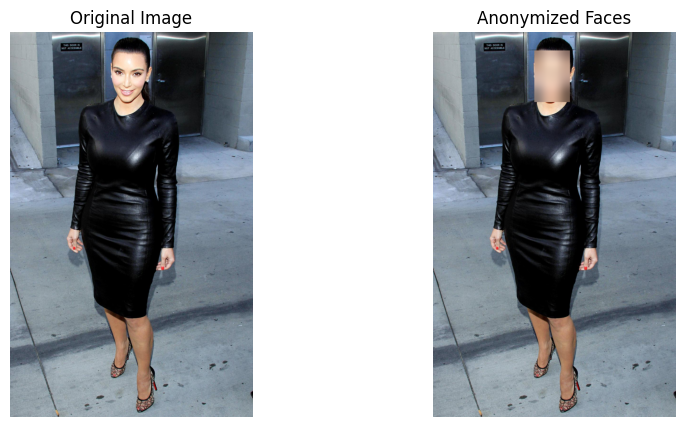


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/23--Shoppers/23_Shoppers_Shoppers_23_565.jpg: 416x640 1 face, 100.5ms
Speed: 2.5ms preprocess, 100.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


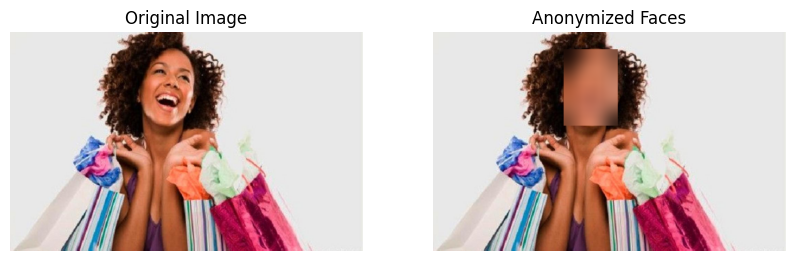


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/26--Soldier_Drilling/26_Soldier_Drilling_Soldiers_Drilling_26_718.jpg: 416x640 6 faces, 94.6ms
Speed: 2.5ms preprocess, 94.6ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


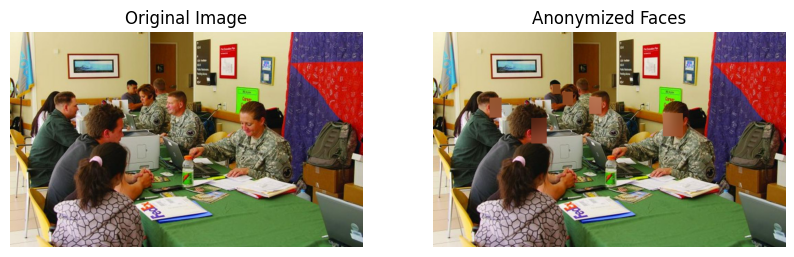


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/40--Gymnastics/40_Gymnastics_Gymnastics_40_236.jpg: 448x640 2 faces, 100.3ms
Speed: 7.9ms preprocess, 100.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


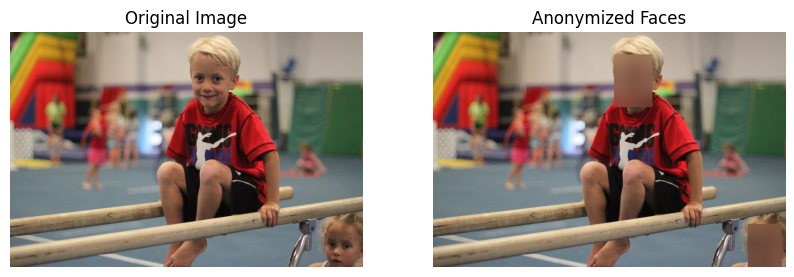


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/4--Dancing/4_Dancing_Dancing_4_111.jpg: 480x640 4 faces, 108.0ms
Speed: 2.8ms preprocess, 108.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


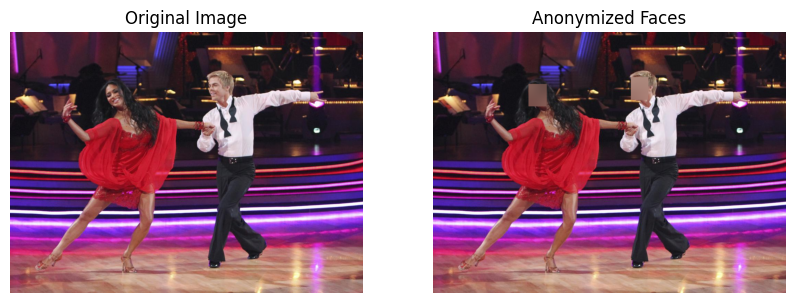


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/13--Interview/13_Interview_Interview_Sequences_13_616.jpg: 384x640 1 face, 90.7ms
Speed: 3.3ms preprocess, 90.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


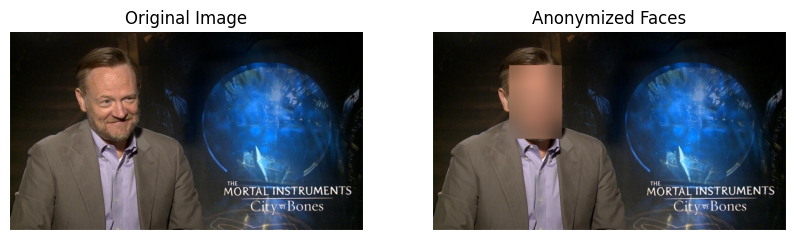


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/43--Row_Boat/43_Row_Boat_Canoe_43_279.jpg: 416x640 1 face, 96.4ms
Speed: 2.5ms preprocess, 96.4ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


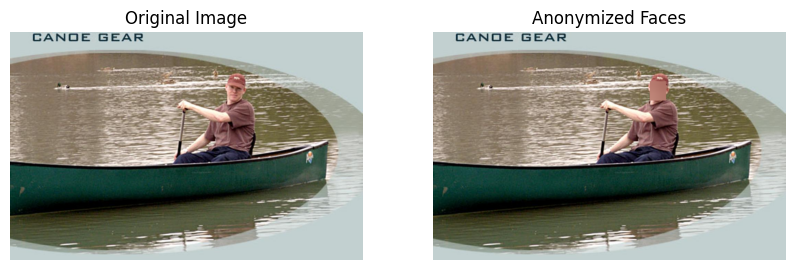


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/12--Group/12_Group_Large_Group_12_Group_Large_Group_12_761.jpg: 480x640 1 face, 113.7ms
Speed: 2.7ms preprocess, 113.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


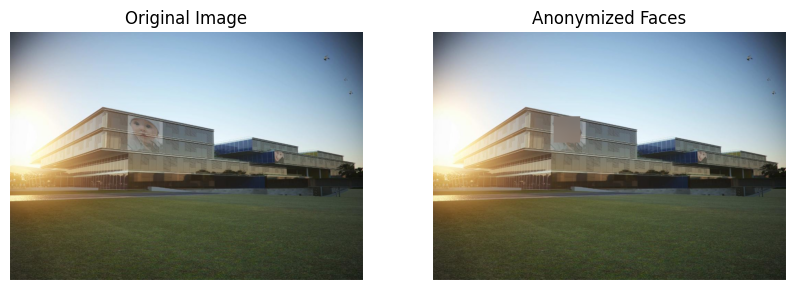


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/52--Photographers/52_Photographers_photographertakingphoto_52_50.jpg: 480x640 1 face, 109.3ms
Speed: 4.3ms preprocess, 109.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


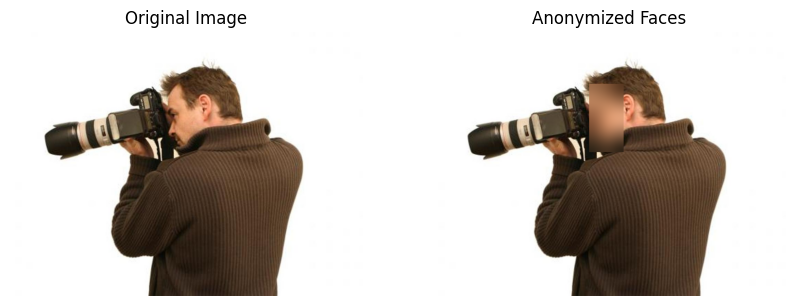


image 1/1 /kaggle/working/WIDER_test/WIDER_test/images/18--Concerts/18_Concerts_Concerts_18_115.jpg: 480x640 1 face, 111.9ms
Speed: 2.7ms preprocess, 111.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


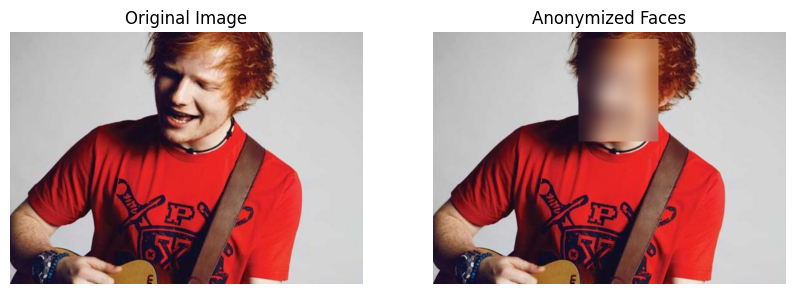

In [14]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import random

model_path = '/kaggle/input/yolov8n-face/pytorch/default/1/yolov8n-face.pt'
model = YOLO(model_path)

def anonymize_faces(img, detections):
    img_copy = img.copy()  # Make a copy to avoid modifying the original
    for detection in detections[0].boxes:
        x1, y1, x2, y2 = map(int, detection.xyxy[0])
        face = img_copy[y1:y2, x1:x2]
        face = cv2.GaussianBlur(face, (99, 99), 30)  # Apply Gaussian blur
        img_copy[y1:y2, x1:x2] = face
    return img_copy

def display_images_side_by_side(img_path, results):
   
    original_img = cv2.imread(img_path)
    anonymized_img = anonymize_faces(original_img, results)
    
    original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    anonymized_img_rgb = cv2.cvtColor(anonymized_img, cv2.COLOR_BGR2RGB)
    
   
    plt.figure(figsize=(10, 5))
    
   
    plt.subplot(1, 2, 1)
    plt.imshow(original_img_rgb)
    plt.axis('off')
    plt.title("Original Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(anonymized_img_rgb)
    plt.axis('off')
    plt.title("Anonymized Faces")
    
    plt.show()

image_folder = '/kaggle/working/WIDER_test/WIDER_test/images'

image_paths = []
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):
            image_paths.append(os.path.join(root, file))

num_images_to_select = 15
if len(image_paths) < num_images_to_select:
    print(f"Warning: Only {len(image_paths)} images found. Sampling all available images.")
    random_image_paths = image_paths
else:
    random_image_paths = random.sample(image_paths, num_images_to_select)  # Choose 15 random images


for img_path in random_image_paths:
    results = model.predict(source=img_path, save=False, show=False)  # Detect faces
    display_images_side_by_side(img_path, results)


# Test Your Image

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

model_path = '/kaggle/input/yolov8n-face/pytorch/default/1/yolov8n-face.pt'
model = YOLO(model_path)

def anonymize_faces(img, detections):
    img_copy = img.copy()
    for detection in detections[0].boxes:
        x1, y1, x2, y2 = map(int, detection.xyxy[0])
        face = img_copy[y1:y2, x1:x2]
        face = cv2.GaussianBlur(face, (199, 199), 60)  # Increased blur intensity
        img_copy[y1:y2, x1:x2] = face
    return img_copy

def display_images(img_path, results):
    original_img = cv2.imread(img_path)
    anonymized_img = anonymize_faces(original_img, results)

    original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    anonymized_img_rgb = cv2.cvtColor(anonymized_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img_rgb)
    plt.axis('off')
    plt.title("Original Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(anonymized_img_rgb)
    plt.axis('off')
    plt.title("Anonymized Image")
    
    plt.show()

def process_single_image(image_path):
    results = model.predict(source=image_path, save=False, show=False)
    display_images(image_path, results)

test_image_path = 'ADD KAGGLE PATH TO YOUR IMAGE' #ADD IMAGE INPUT PATH HERE
process_single_image(test_image_path)
